Importing Libraries

In [1]:
UBIT = 'tanmaypr';
import itertools
import math
import scipy
from scipy.spatial import distance
from numpy import linalg as LA
from copy import deepcopy
import numpy as np
import random
from random import randint
np.random.seed(sum([ord(c) for c in UBIT])) ##used for randomly selecting initial cluster centers for kmeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
# load decomposition to do PCA analysis with sklearn
from sklearn.datasets import load_digits
from sklearn.mixture.base import BaseMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

Function for Similarity Matrix to Generate a Graph out of the data points

In [2]:
def SimilarityMAt(data,sigma):
    w = len(data.index)
    Matrix = [[0 for x in range(w)] for y in range(w)] 
    for i, point in data.iterrows():
        for j, p in data.iterrows():
            d = distance.euclidean(point, p)
            val = (-1 * (d*d)/(sigma*sigma))
            val = math.exp(val);
            Matrix[i][j]= val
           
        
    return Matrix

Function to Generate a Diagonal Matrix

In [3]:
def DiagonalMat(Mat):
    w = Mat.shape[1]
    Matrix = [[0 for x in range(w)] for y in range(w)] 
    row = 0
    col = 0
    sum = 0
    for i in Mat:
        for j in i:
            sum = sum + j
        Matrix[row][col]= sum
        sum = 0
        row+=1
        col+=1
        
    return Matrix

Function to calculate euclidean distance

In [4]:
def dist(a, b,axis):
    return np.linalg.norm(a - b, axis=axis)

Function for Kmeans

In [5]:
def myKMean(n,z1,rows):
    a=0
    #z=z1[:,2:]
    labels=[]
    t = 0
    for i in range(len(z1)):
        labels.append(t)
        t+=1
    x=np.array
    x=z1
    x = (x-x.min())/(x.max()-x.min())
    f1=x[:,:1]
    f2=x[:,1:2]
    f3=x[:,2:]
    
    number_of_clusters=n
    center_of_clusters=np.array
    center_of_clusters=x[rows,:]
    c_old=np.zeros(center_of_clusters.shape)
    error = dist(center_of_clusters, c_old,None)    
    distance_from_centroid=[]
    
    while error!=0:
        clusters=[]
        for i in range(len(x)):
            distance_from_centroid=[]
            for j in range(number_of_clusters):
                #print(dist(x[i],center_of_clusters[j],axis=None))
                distance_from_centroid.append(dist(x[i],center_of_clusters[j],axis=None))
            cluster=distance_from_centroid.index(min(distance_from_centroid))
            clusters.append(cluster)
       
        c_old=deepcopy(center_of_clusters)
        for i in range(number_of_clusters):
            points=[]
            for j in range(len(x)):
                if clusters[j]==i:
                    points.append(x[j,:])
                    labels[j]=labels[i]  
            center_of_clusters[i] = np.mean(points, axis=0)
        
        error = dist(center_of_clusters, c_old, None)  
        
    return center_of_clusters,clusters,labels,x
    

Function to make list of list to list

In [6]:
def listToList(lst): 
    return list(map(lambda el:[el], lst)) 

Function to get the unique clusters from the total list of clusters

In [7]:
def Unique_Clusters(clusters):
    temp=set()
    unique_clusters=[]
    for i in range(len(clusters)):
        if(clusters[i] in temp):
            continue
        else:
            temp.add(clusters[i])
            unique_clusters.append(clusters[i])
    return unique_clusters

Function to perform pca plot for our implementation

In [8]:
def PCA_Plot(clusters,input_file):
    clusters1=listToList(clusters)
    pca_data = PCA(n_components = 2).fit_transform(input_file)
    finalDf = np.concatenate((pca_data, clusters1), axis = 1)
    finalDf = pd.DataFrame({'Component1': finalDf[:, 0], 'Component2': finalDf[:, 1], 'Target': finalDf[:, 2]})
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = unique_clusters
    colors=[]
    for i in range(len(unique_clusters)):
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'Component1']
                   , finalDf.loc[indicesToKeep, 'Component2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

Function to perform pca plot for library implementation

In [9]:
def PCA_PLOT_LIB(clusters,input_file):
    assigned_cluster=clusters.reshape((len(input_file),1))
    pca_data = PCA(n_components = 2).fit_transform(input_file)
    finalDf = np.concatenate((pca_data, assigned_cluster), axis = 1)
    finalDf = pd.DataFrame({'Component1': finalDf[:, 0], 'Component2': finalDf[:, 1], 'Target': finalDf[:, 2]})
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets=unique_clusters1
    colors=[]
    for i in range(len(unique_clusters)):
            colors.append('#%06X' % randint(0, 0xFFFFFF))
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['Target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'Component1']
                   , finalDf.loc[indicesToKeep, 'Component2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

Calculating Jaccard and Rand Coefficient

In [10]:
def JaccardRand(cluster, assigned_cluster):
    ground_truth_matrix = np.zeros((len(assigned_cluster),len(assigned_cluster)))
    incidence_matrix = np.zeros((len(assigned_cluster),len(assigned_cluster)))

    for i in range(len(assigned_cluster)):
        for j in range(len(assigned_cluster)):
            ground_truth_matrix[i][j] = 1 if (assigned_cluster[i]==assigned_cluster[j]) else 0
            incidence_matrix[i][j] = 1 if (cluster[i]==cluster[j]) else 0
            
    m_1_1 = m_0_0 = m_1_0 = m_0_1 = 0.0
    for i in range(len(ground_truth_matrix)):
        for j in range(len(ground_truth_matrix)):
            if ground_truth_matrix[i][j] == incidence_matrix[i][j]:
                if ground_truth_matrix[i][j] == 1:
                    m_1_1 += 1
                else:
                    m_0_0 += 1
            else:
                if ground_truth_matrix[i][j] == 1:
                    m_1_0 += 1
                else:
                    m_0_1 += 1


    Jaccard = str(m_1_1 / (m_1_1 + m_1_0 + m_0_1))  
    Rand = str((m_1_1 + m_0_0) / (m_1_1 + m_0_0 + m_1_0 + m_0_1))
    print("The RAND coefficient is:"+str(Rand))
    print("The JACCARD coefficient is:"+str(Jaccard))

In [11]:
def EigenGap(EigenValues, ev):
    diff = 0
    idx = 0
    for i in range(1,len(ev)):
        tmp = abs(EigenValues[ev[i]]-EigenValues[ev[i-1]])
        if(tmp > diff):
            diff = tmp
            idx = ev[i]
            
    return idx
            
    

Loading Cho Data-set

In [12]:
data = pd.read_csv("/Users/krishna/Desktop/cho.csv",header=None)
dataRows,dataCols=data.shape
data=data.iloc[:,2:]

In [13]:
SimilarityMatrix = SimilarityMAt(data,3) # Similarity Matrix
Mat = np.array(SimilarityMatrix) 
#Mat
DiagonalMatrix = np.array(DiagonalMat(Mat)) # Diagonal Matrix

LaplaceMatrix = DiagonalMatrix - Mat # Laplace Matrix
#DiagonalMatrix

Eigen Values and Eigen Vectors

In [14]:
EigenValues, EigenVectors = LA.eig(LaplaceMatrix)

Sorting Eigen values and their corresponding Vectors

In [15]:
#idx = EigenValues.argsort()[:2]  

ev = EigenValues.argsort()
EigenGapval = EigenGap(EigenValues, ev)

print(EigenGapval)

idx = ev[:EigenGapval] 
EigenValues = EigenValues[idx] 
EigenVectors = EigenVectors[:,idx]


3


In [16]:
type_of_centroid_initialization=int(input("Random or specific initialization?\nRandom:enter 1\nSpecific:enter 2\n"))
numberOfClusters=int(input("Enter number of centroids"))
filename=input("select file\ncho.txt:enter 1\niyer.txt:enter 2\n")

Random or specific initialization?
Random:enter 1
Specific:enter 2
2
Enter number of centroids5
select file
cho.txt:enter 1
iyer.txt:enter 2
1


In [17]:
if filename=='1':
    filename="cho.txt"
else:
    filename="iyer.txt"

In [18]:
input_file=np.loadtxt("/Users/krishna/Downloads/"+filename)
ipf = input_file[:,2:]
input_file1=input_file[:,:2]#cho data from 2nd column to last
input_file = EigenVectors

ipf

array([[-0.69 , -0.96 , -1.16 , ..., -0.04 ,  0.19 ,  0.82 ],
       [-0.21 ,  0.19 ,  0.86 , ..., -1.23 , -0.325,  0.   ],
       [-0.3  , -0.56 , -0.29 , ..., -0.12 , -0.16 ,  0.67 ],
       ...,
       [-3.12 , -4.12 , -3.54 , ...,  1.48 ,  2.06 ,  2.36 ],
       [-0.79 , -0.56 , -0.79 , ...,  0.49 ,  0.08 ,  0.15 ],
       [-1.16 , -1.39 , -0.96 , ...,  0.493,  1.27 ,  0.87 ]])

In [19]:
#input_file=np.loadtxt("/Users/krishna/Downloads/"+filename)
# input_file1=input_file[:,:2]#cho data from 2nd column to last
# input_file = EigenVectors
if type_of_centroid_initialization==1:
    rows=random.sample(range(1, len(input_file[:,0])), k=int(numberOfClusters))
    print(type(rows))
else:
    rows=[]
    print("Enter "+str(numberOfClusters)+" number between 1 and "+str(len(input_file[:,0])))
    for i in range(int(numberOfClusters)):
        rows.append(int(input()))
    print(rows)
center_of_clusters,clusters,label,x=myKMean(numberOfClusters,input_file,rows)#performing kmeans using our method

Enter 5 number between 1 and 386
1
85
217
284
355
[1, 85, 217, 284, 355]


Unique clusters from our method

In [20]:
unique_clusters=Unique_Clusters(clusters) 
unique_clusters

[1, 2, 3, 4, 0]

PCA for our method

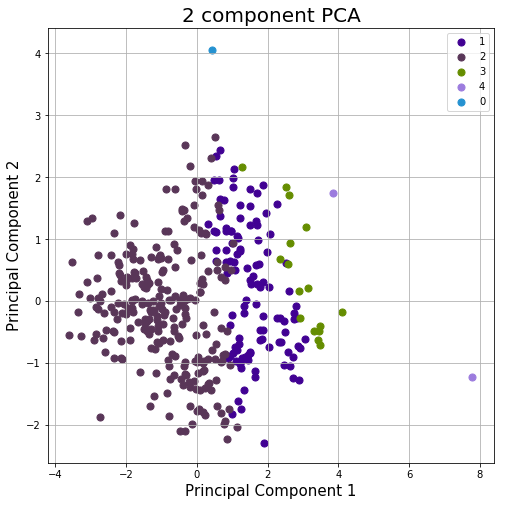

In [21]:
PCA_Plot(clusters,ipf) 

Performing kmeans using library method

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(numberOfClusters, random_state=0).fit(input_file)#performing kmeans using library method
unique_clusters1=Unique_Clusters(kmeans.labels_)#getting unique clusters from library method
unique_clusters1

[0, 4, 2, 3, 1]

In [23]:
JaccardRand(input_file1[:,1],clusters)#jaccard and rand coefficient for our method

The RAND coefficient is:0.6024993959569385
The JACCARD coefficient is:0.3086566746042863


Loading IYER Data-set

In [24]:
data = pd.read_csv("/Users/krishna/Desktop/iyer.csv",header=None)
dataRows,dataCols=data.shape
data=data.iloc[:,3:]
#data

In [25]:
SimilarityMatrix = SimilarityMAt(data,5) # Similarity Matrix
Mat = np.array(SimilarityMatrix)
DiagonalMatrix = np.array(DiagonalMat(Mat)) # Diagonal Matrix
LaplaceMatrix = DiagonalMatrix - Mat # Laplace Matrix


In [26]:
EigenValues, EigenVectors = LA.eig(LaplaceMatrix)
#Sorting Eigen values and their corresponding Vectors

ev = EigenValues.argsort()
EigenGapval = EigenGap(EigenValues, ev)

print(EigenGapval)

idx = ev[:EigenGapval] 
EigenValues = EigenValues[idx] 
EigenVectors = EigenVectors[:,idx]

94


In [27]:
type_of_centroid_initialization=int(input("Random or specific initialization?\nRandom:enter 1\nSpecific:enter 2\n"))
numberOfClusters=int(input("Enter number of centroids"))
filename=input("select file\ncho.txt:enter 1\niyer.txt:enter 2\n")

Random or specific initialization?
Random:enter 1
Specific:enter 2
2
Enter number of centroids10
select file
cho.txt:enter 1
iyer.txt:enter 2
2


In [28]:
if filename=='1':
    filename="cho.txt"
else:
    filename="iyer.txt"

In [29]:
input_file=np.loadtxt("/Users/krishna/Downloads/"+filename)
ipf = input_file[:,2:]
input_file1=input_file[:,:2]#iyer data from 2nd column to last
input_file = EigenVectors

if type_of_centroid_initialization==1:
    rows=random.sample(range(1, len(input_file[:,0])), k=int(numberOfClusters))
    print(type(rows))
else:
    rows=[]
    print("Enter "+str(numberOfClusters)+" number between 1 and "+str(len(input_file[:,0])))
    for i in range(int(numberOfClusters)):
        rows.append(int(input()))
    print(rows)
center_of_clusters,clusters,label,x=myKMean(numberOfClusters,input_file,rows)#performing kmeans using our method

Enter 10 number between 1 and 517
2
225
269
302
349
356
398
415
477
514
[2, 225, 269, 302, 349, 356, 398, 415, 477, 514]


In [30]:
unique_clusters=Unique_Clusters(clusters)#getting the unique clusters from our method
unique_clusters

[1, 8, 3, 2, 4, 5, 7, 6, 0, 9]

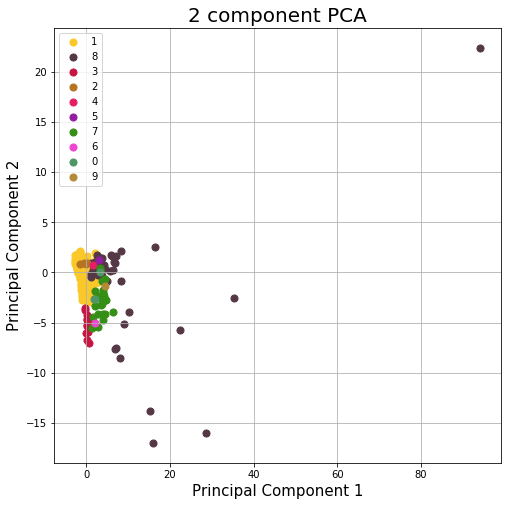

In [31]:
PCA_Plot(clusters,ipf)#pca for our method

In [32]:
#PCA_PLOT_LIB(kmeans.labels_,input_file1)#pca for library method

In [33]:
JaccardRand(input_file1[:,1],clusters) #jaccard and rand coefficient for our method

The RAND coefficient is:0.44053066156856435
The JACCARD coefficient is:0.19759611515037695
